In [4]:
# Iizumi の輸出入 CSV を読み込み、国→国の輸出入行列（pivot）を作るノート

#このノートでは、'Iizumi/Trade_DetailedTradeMatrix_E_All_Data_NOFLAG.csv' を読み込み、各国（報告国）から各国（相手国）への輸出/輸入を集計した行列を作ります。

#実行はステップごとに分かれています。まずはセルを上から順に実行してください。

In [5]:
import sys, os
print("executable:", sys.executable)
print("version:", sys.version.split()[0])


executable: /home/tsuda/anaconda3/envs/nb312/bin/python
version: 3.12.11


In [40]:
# --- セクション 1: 必要なライブラリと CSV パスの定義
import pandas as pd
from pathlib import Path
from typing import Dict, Optional

# CSV のパス（必要に応じて変更してください）
DATA_CSV = Path("Trade_DetailedTradeMatrix_E_All_Data_NOFLAG.csv")

# 小さなユーティリティ: 表示用の Pandas 設定
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 160)


In [41]:
import pandas as pd
from pathlib import Path

# ===== 設定 =====


READ_FULL = True   # True: 全行読む / False: 先頭N行だけ読む
N = 10000           # READ_FULL=False のときだけ使われる

# ===== 1) 読み込み =====
print("=== Loading CSV ===")
if READ_FULL:
    df = pd.read_csv(DATA_CSV, low_memory=False)
else:
    df = pd.read_csv(DATA_CSV, nrows=N, low_memory=False)

print("loaded:", DATA_CSV)
print("shape:", df.shape)
print("columns:", len(df.columns))

# ===== 2) 列名一覧 =====
print("\n=== Columns list ===")
for i, c in enumerate(df.columns):
    print(f"{i:02d}: {c}")

# ===== 3) dtypeと欠損率 =====
info = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "n_missing": df.isna().sum(),
    "missing_rate": (df.isna().mean() * 100).round(2),
    "n_unique": df.nunique(dropna=True),
}).sort_values(["missing_rate", "n_unique"], ascending=[False, False])

print("\n=== Column stats (sorted by missing_rate, n_unique) ===")
display(info)

# ===== 4) 「カテゴリっぽい列」候補（ユニーク数が少ない） =====
cat_candidates = info[info["n_unique"].between(2, 50)].sort_values("n_unique")
print("\n=== Categorical-like columns (2~50 unique) ===")
display(cat_candidates)

# ===== 5) 代表的な値を覗く（上位10件） =====
def show_top_values(col, k=10):
    vc = df[col].value_counts(dropna=False).head(k)
    out = vc.rename_axis(col).reset_index(name="count")
    out["rate_%"] = (out["count"] / len(df) * 100).round(2)
    return out

print("\n=== Preview top values for categorical-like columns ===")
for col in cat_candidates.index[:10]:  # 多すぎると大変なので上位10列だけ
    print(f"\n--- {col} ---")
    display(show_top_values(col, k=10))

# ===== 6) 数値列の概要 =====
num_cols = df.select_dtypes(include="number").columns.tolist()
print("\n=== Numeric columns ===")
print(num_cols)

if num_cols:
    display(df[num_cols].describe().T)

# ===== 7) サンプル行 =====
print("\n=== Sample rows ===")
display(df.head(5))
display(df.tail(5))


=== Loading CSV ===
loaded: Trade_DetailedTradeMatrix_E_All_Data_NOFLAG.csv
shape: (6640547, 51)
columns: 51

=== Columns list ===
00: Reporter Country Code
01: Reporter Country Code (M49)
02: Reporter Countries
03: Partner Country Code
04: Partner Country Code (M49)
05: Partner Countries
06: Item Code
07: Item Code (CPC)
08: Item
09: Element Code
10: Element
11: Unit
12: Y1986
13: Y1987
14: Y1988
15: Y1989
16: Y1990
17: Y1991
18: Y1992
19: Y1993
20: Y1994
21: Y1995
22: Y1996
23: Y1997
24: Y1998
25: Y1999
26: Y2000
27: Y2001
28: Y2002
29: Y2003
30: Y2004
31: Y2005
32: Y2006
33: Y2007
34: Y2008
35: Y2009
36: Y2010
37: Y2011
38: Y2012
39: Y2013
40: Y2014
41: Y2015
42: Y2016
43: Y2017
44: Y2018
45: Y2019
46: Y2020
47: Y2021
48: Y2022
49: Y2023
50: Y2024
loaded: Trade_DetailedTradeMatrix_E_All_Data_NOFLAG.csv
shape: (6640547, 51)
columns: 51

=== Columns list ===
00: Reporter Country Code
01: Reporter Country Code (M49)
02: Reporter Countries
03: Partner Country Code
04: Partner Country Co

,dtype,n_missing,missing_rate,n_unique
Y1986,float64,6215777,93.60,20735
Y1987,float64,6205386,93.45,22066
Y1988,float64,6162037,92.79,22699
Y1989,float64,6139941,92.46,23105
Y1990,float64,6137606,92.43,23283
Y1991,float64,6066214,91.35,26429
Y1992,float64,6003653,90.41,27431
Y1993,float64,5947222,89.56,27496
Y1994,float64,5858419,88.22,29364
Y1995,float64,5803181,87.39,30265



=== Categorical-like columns (2~50 unique) ===


,dtype,n_missing,missing_rate,n_unique
Element,object,0,0.0,4
Unit,object,0,0.0,5
Element Code,int64,0,0.0,10



=== Preview top values for categorical-like columns ===

--- Element ---


,Element,count,rate_%
0,Import value,1742699,26.24
1,Import quantity,1742231,26.24
2,Export quantity,1578643,23.77
3,Export value,1576974,23.75



--- Unit ---


,Unit,count,rate_%
0,1000 USD,3319673,49.99
1,t,3269319,49.23
2,An,34018,0.51
3,1000 An,15716,0.24
4,No,1821,0.03



--- Element Code ---


,Element Code,count,rate_%
0,5622,1742699,26.24
1,5610,1717472,25.86
2,5922,1576974,23.75
3,5910,1551847,23.37
4,5908,17550,0.26
5,5608,16468,0.25
6,5909,8360,0.13
7,5609,7356,0.11
8,5607,935,0.01
9,5907,886,0.01



=== Numeric columns ===
['Reporter Country Code', 'Partner Country Code', 'Item Code', 'Element Code', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022', 'Y2023', 'Y2024']


,count,mean,std,min,25%,50%,75%,max
Reporter Country Code,6640547.0,132.716342,7.371411e+01,1.0,68.00,131.00,202.0000,2.990000e+02
Partner Country Code,6640547.0,131.993833,7.371094e+01,1.0,68.00,126.00,202.0000,2.990000e+02
Item Code,6640547.0,555.001813,3.518225e+02,15.0,244.00,537.00,831.0000,1.296000e+03
Element Code,6640547.0,5758.546793,1.499331e+02,5607.0,5610.00,5622.00,5910.0000,5.922000e+03
Y1986,424770.0,3044.371236,9.711633e+04,0.0,5.00,31.00,248.0000,4.038162e+07
Y1987,435161.0,3230.834104,8.165870e+04,0.0,6.00,35.00,282.0000,3.754480e+07
Y1988,478510.0,3432.696474,3.161247e+05,0.0,5.00,32.00,257.0000,2.130323e+08
Y1989,500606.0,2802.664347,6.064637e+04,0.0,5.00,32.00,252.0000,1.748507e+07
Y1990,502941.0,2728.276227,4.940303e+04,0.0,5.00,33.00,255.0000,1.405326e+07
Y1991,574333.0,2849.933061,4.820509e+04,0.0,7.00,38.00,292.0000,1.404678e+07



=== Sample rows ===


,Reporter Country Code,Reporter Country Code (M49),Reporter Countries,Partner Country Code,Partner Country Code (M49),Partner Countries,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023,Y2024
0,2,'004,Afghanistan,9,'032,Argentina,341,'21910.90,"Cake, oilseeds nes",5610,Import quantity,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.11,NaN,1192.62,NaN,NaN,NaN,NaN,NaN
1,2,'004,Afghanistan,9,'032,Argentina,341,'21910.90,"Cake, oilseeds nes",5622,Import value,1000 USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.00,NaN,217.00,NaN,NaN,NaN,NaN,NaN
2,2,'004,Afghanistan,9,'032,Argentina,1232,'F1232,Food preparations n.e.c.,5610,Import quantity,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,'004,Afghanistan,9,'032,Argentina,1232,'F1232,Food preparations n.e.c.,5622,Import value,1000 USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,'004,Afghanistan,9,'032,Argentina,1058,'21121,"Meat of chickens, fresh or chilled",5610,Import quantity,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Reporter Country Code,Reporter Country Code (M49),Reporter Countries,Partner Country Code,Partner Country Code (M49),Partner Countries,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023,Y2024
6640542,181,'716,Zimbabwe,181,'716,Zimbabwe,667,'01620,Tea leaves,5622,Import value,1000 USD,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6640543,181,'716,Zimbabwe,181,'716,Zimbabwe,826,'01970,Unmanufactured tobacco,5610,Import quantity,t,254.0,NaN,NaN,NaN,7.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6640544,181,'716,Zimbabwe,181,'716,Zimbabwe,826,'01970,Unmanufactured tobacco,5622,Import value,1000 USD,571.0,NaN,NaN,NaN,5.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6640545,181,'716,Zimbabwe,181,'716,Zimbabwe,565,'24220,Vermouth and other wine of fresh grapes flavou...,5610,Import quantity,t,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6640546,181,'716,Zimbabwe,181,'716,Zimbabwe,565,'24220,Vermouth and other wine of fresh grapes flavou...,5622,Import value,1000 USD,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## すぐにとってこれるように（あと、いつの年代を基準にするか）

- ファイル内の列名を表示して、`detect_trade_columns` の推測が正しいか必ず確認してください。
- 年やフロー名はデータセットによって表記揺れがあります（例: 'Export' / 'Exports' / 'EXPORT'）。必要なら `example_flow` をデータに合わせて変更してください。
- 大きなデータの場合、pivot のメモリ使用量に注意してください。必要ならサンプリングや年ごとの分割処理を行ってください。


# ためしに2019年のrice milledのネットワークを描いてみる。

,reporter,partner,value,reporter_total,dest_share
2,Afghanistan,Pakistan,4097.82,6553.08,0.625327
1,Afghanistan,India,2422.03,6553.08,0.369602
42,Argentina,Chile,94868.40,243841.26,0.389058
38,Argentina,Brazil,63755.90,243841.26,0.261465
62,Argentina,Iraq,31200.00,243841.26,0.127952
44,Argentina,Costa Rica,13322.40,243841.26,0.054636
37,Argentina,Bolivia (Plurinational State of),13026.20,243841.26,0.053421
73,Argentina,Mexico,13023.30,243841.26,0.053409
93,Argentina,Türkiye,6465.70,243841.26,0.026516
80,Argentina,Peru,4494.70,243841.26,0.018433


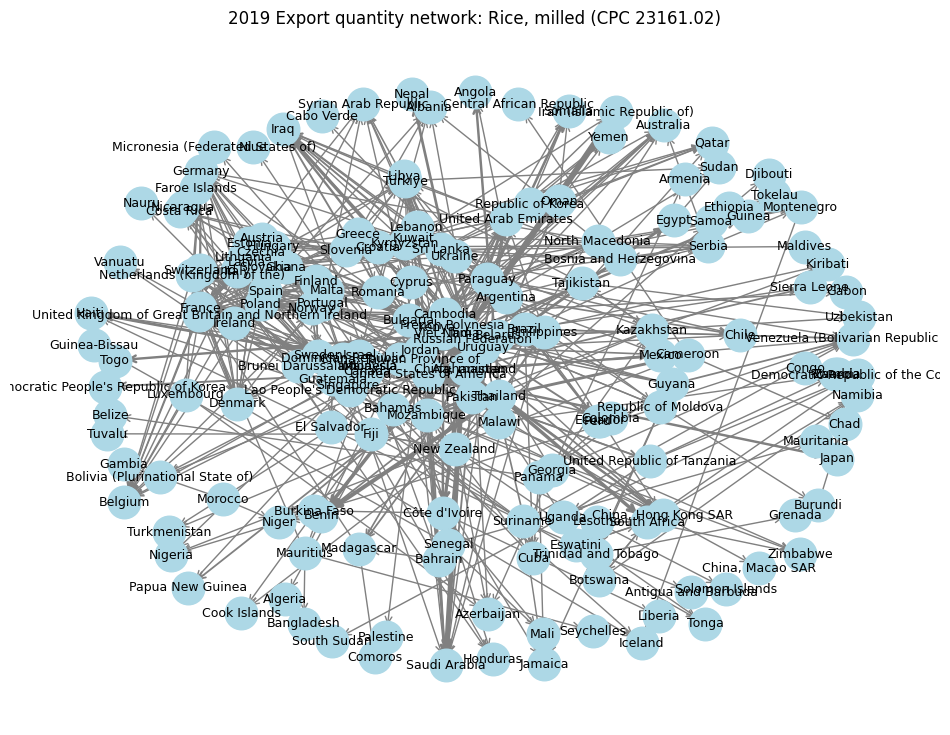

In [42]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- あなたのdfに合わせて固定（ログの columns から確定）
REPORTER = "Reporter Countries"
PARTNER  = "Partner Countries"
ITEMCPC  = "Item Code (CPC)"     # ★ここが重要（23161.02 が入ってる列）
ELEMENT  = "Element"
YCOL     = "Y2019"               # 2019で描く
ITEMCODE = "23161.02"
ELEMVAL  = "Export quantity"     # ★これを使う

# 1) フィルタ
df2 = df.copy()
df2 = df2[df2[ELEMENT].astype(str).str.strip().str.lower() == ELEMVAL.lower()]
df2 = df2[df2[ITEMCPC].astype(str).str.contains(ITEMCODE, na=False)]

# 2) 年列を数値化（NaN→0）
df2[YCOL] = pd.to_numeric(df2[YCOL], errors="coerce").fillna(0)

# 3) 集計（reporter→partner の数量）
grp = (
    df2.groupby([REPORTER, PARTNER], as_index=False)[YCOL]
       .sum()
       .rename(columns={REPORTER:"reporter", PARTNER:"partner", YCOL:"value"})
)

# 4) reporter別シェア
tot = grp.groupby("reporter", as_index=False)["value"].sum().rename(columns={"value":"reporter_total"})
grp = grp.merge(tot, on="reporter", how="left")
grp["dest_share"] = grp["value"] / grp["reporter_total"].replace(0, pd.NA)
grp = grp.dropna(subset=["dest_share"])

# 5) 見やすさ用フィルタ（必要なら調整）
grp = grp[grp["dest_share"] >= 0.01]  # 1%未満は切る
grp = grp.sort_values(["reporter","value"], ascending=[True, False]).groupby("reporter").head(10)

display(grp.head(30))

# 6) 描画
if grp.empty:
    print("2019の値が全部0/NaN か、フィルタ(>=1%)が厳しすぎます。dest_share閾値を下げてください。")
else:
    G = nx.DiGraph()
    for _, r in grp.iterrows():
        u, v = str(r["reporter"]), str(r["partner"])
        w = float(r["value"])
        if G.has_edge(u, v):
            G[u][v]["weight"] += w
        else:
            G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G, k=0.6, iterations=60, seed=1)
    weights = [G[u][v]["weight"] for u,v in G.edges()]
    maxw = max(weights) if weights else 1.0
    widths = [1 + 5*(w/maxw) for w in weights]

    plt.figure(figsize=(12, 9))
    nx.draw_networkx_nodes(G, pos, node_size=550, node_color="lightblue")
    nx.draw_networkx_labels(G, pos, font_size=9)
    nx.draw_networkx_edges(G, pos, width=widths, arrowstyle="->", arrowsize=12, edge_color="gray")
    plt.title("2019 Export quantity network: Rice, milled (CPC 23161.02)")
    plt.axis("off")
    plt.show()


,reporter,partner,value,reporter_total,dest_share
2,Afghanistan,Pakistan,4097.82,6553.08,0.625327
1,Afghanistan,India,2422.03,6553.08,0.369602
42,Argentina,Chile,94868.40,243841.26,0.389058
38,Argentina,Brazil,63755.90,243841.26,0.261465
62,Argentina,Iraq,31200.00,243841.26,0.127952
44,Argentina,Costa Rica,13322.40,243841.26,0.054636
37,Argentina,Bolivia (Plurinational State of),13026.20,243841.26,0.053421
73,Argentina,Mexico,13023.30,243841.26,0.053409
93,Argentina,Türkiye,6465.70,243841.26,0.026516
80,Argentina,Peru,4494.70,243841.26,0.018433


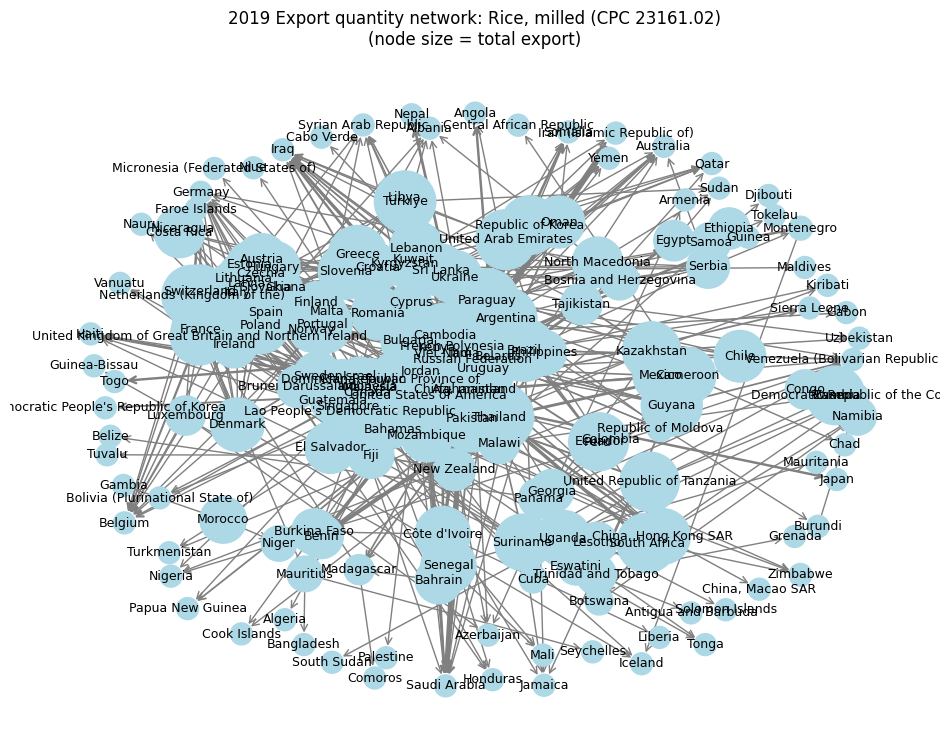

In [58]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# --- あなたのdfに合わせて固定
REPORTER = "Reporter Countries"
PARTNER  = "Partner Countries"
ITEMCPC  = "Item Code (CPC)"
ELEMENT  = "Element"
YCOL     = "Y2019"
ITEMCODE = "23161.02"
ELEMVAL  = "Export quantity"   # Export quantityネットワークを描く

def scale_sizes(values_dict, node_list, out_range=(200, 2200), log_scale=True):
    """dict {node: value} を node_list順にスケールして node_size配列を返す"""
    vals = np.array([float(values_dict.get(n, 0.0)) for n in node_list], dtype=float)

    if log_scale:
        vals = np.log1p(vals)  # 0を保ちつつ圧縮

    vmin, vmax = vals.min(), vals.max()
    if vmax == vmin:
        return np.full(len(node_list), np.mean(out_range), dtype=float)

    a, b = out_range
    scaled = a + (vals - vmin) * (b - a) / (vmax - vmin)
    return scaled

# ===== 1) フィルタ =====
df2 = df.copy()
df2 = df2[df2[ELEMENT].astype(str).str.strip().str.lower() == ELEMVAL.lower()]
df2 = df2[df2[ITEMCPC].astype(str).str.contains(ITEMCODE, na=False)]

# ===== 2) 年列を数値化 =====
df2[YCOL] = pd.to_numeric(df2[YCOL], errors="coerce").fillna(0)

# ===== 3) 集計（reporter→partner の数量） =====
grp = (
    df2.groupby([REPORTER, PARTNER], as_index=False)[YCOL]
       .sum()
       .rename(columns={REPORTER:"reporter", PARTNER:"partner", YCOL:"value"})
)

# ===== 4) reporter別シェア =====
tot = grp.groupby("reporter", as_index=False)["value"].sum().rename(columns={"value":"reporter_total"})
grp = grp.merge(tot, on="reporter", how="left")
grp["dest_share"] = grp["value"] / grp["reporter_total"].replace(0, pd.NA)
grp = grp.dropna(subset=["dest_share"])

# ===== 5) 見やすさ用フィルタ =====
grp_plot = grp.copy()
grp_plot = grp_plot[grp_plot["dest_share"] >= 0.01]   # 1%未満は切る
grp_plot = grp_plot.sort_values(["reporter","value"], ascending=[True, False]).groupby("reporter").head(10)

display(grp_plot.head(30))

# ===== 6) 描画（ノードサイズを量で表現） =====
if grp_plot.empty:
    print("フィルタが厳しすぎます。dest_share閾値を下げてください。")
else:
    # ネットワーク構築（描画に使うのはフィルタ後のエッジ）
    G = nx.DiGraph()
    for _, r in grp_plot.iterrows():
        u, v = str(r["reporter"]), str(r["partner"])
        w = float(r["value"])
        if G.has_edge(u, v):
            G[u][v]["weight"] += w
        else:
            G.add_edge(u, v, weight=w)

    # --- ノード量の定義 ---
    # 「輸出量」：reporterとしての合計（全相手国）
    exporter_total = grp.groupby("reporter")["value"].sum().to_dict()

    # 「輸入量」：partnerとして受け取る合計（= partner側のin-strength）
    importer_total = grp.groupby("partner")["value"].sum().to_dict()

    # どっちでサイズを付けるか
    mode = "export"  # "export" or "import" に変更して使う

    nodes = list(G.nodes())
    if mode == "export":
        size_dict = exporter_total
        title_suffix = "node size = total export"
    else:
        size_dict = importer_total
        title_suffix = "node size = total import"

    node_sizes = scale_sizes(size_dict, nodes, out_range=(250, 2500), log_scale=True)

    # レイアウト
    pos = nx.spring_layout(G, k=0.6, iterations=60, seed=1)

    # エッジ幅
    weights = [G[u][v]["weight"] for u, v in G.edges()]
    maxw = max(weights) if weights else 1.0
    widths = [1 + 5*(w/maxw) for w in weights]

    plt.figure(figsize=(12, 9))
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue")
    nx.draw_networkx_labels(G, pos, font_size=9)
    nx.draw_networkx_edges(G, pos, width=widths, arrowstyle="->", arrowsize=12, edge_color="gray")
    plt.title(f"2019 Export quantity network: Rice, milled (CPC 23161.02)\n({title_suffix})")
    plt.axis("off")
    plt.show()


# 輸入も描画

,exporter,importer,value,exporter_total,dest_share
0,Afghanistan,Uzbekistan,419.17,475.33,0.881851
1,Afghanistan,Kazakhstan,21.96,475.33,0.046199
2,Afghanistan,Saudi Arabia,21.20,475.33,0.044601
3,Afghanistan,Mozambique,7.00,475.33,0.014727
4,Afghanistan,Canada,6.00,475.33,0.012623
5,Afghanistan,Azerbaijan,0.00,475.33,0.0
6,Afghanistan,Benin,0.00,475.33,0.0
7,Afghanistan,Djibouti,0.00,475.33,0.0
8,Afghanistan,Gabon,0.00,475.33,0.0
9,Afghanistan,Germany,0.00,475.33,0.0


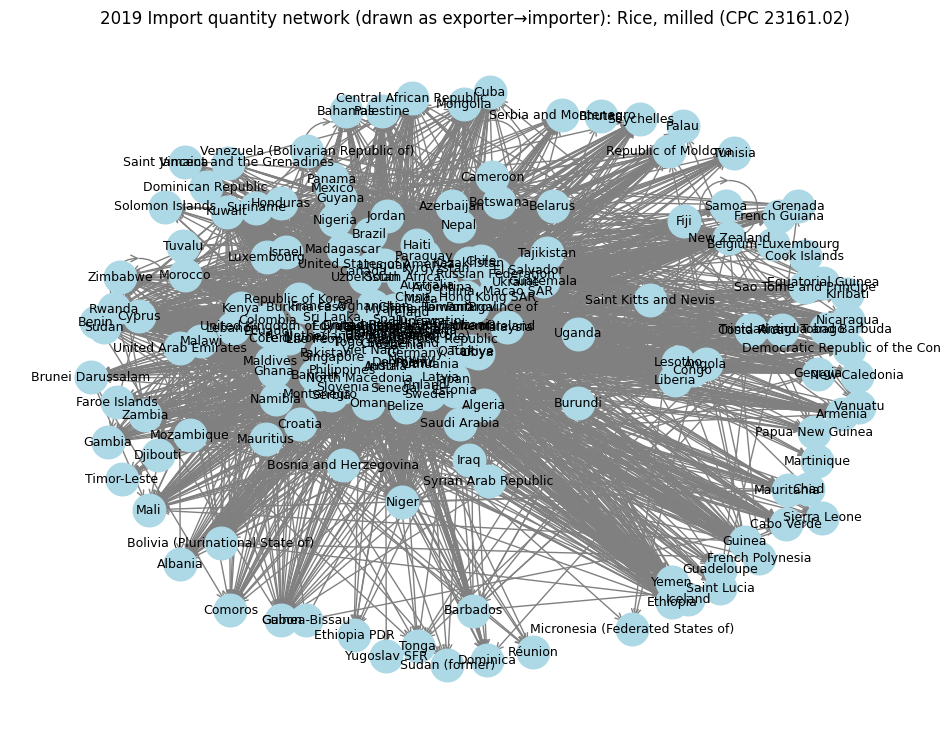

In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ===== 1) Import quantity 用：集計（矢印用に "exporter"→"importer" で返す）
def build_import_quantity_edges(
    df,
    year=2019,
    item_code_cpc="23161.02",
    top_n_dest=10,              # exporterごとに上位Nのimporterを残す（見やすさ）
    dest_share_threshold=0.01,  # exporter→importer シェアの閾値
):
    # あなたのdf列名に合わせて固定（確定済み）
    REPORTER = "Reporter Countries"      # 輸入を報告する国（= importer 側）
    PARTNER  = "Partner Countries"       # 相手国（= exporter 側として扱う）
    ITEMCPC  = "Item Code (CPC)"
    ELEMENT  = "Element"
    YCOL     = f"Y{year}"

    # 必須チェック
    need = [REPORTER, PARTNER, ITEMCPC, ELEMENT, YCOL]
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise ValueError(f"dfに必要な列がありません: {missing}")

    df2 = df.copy()

    # Import quantity のみ
    df2 = df2[df2[ELEMENT].astype(str).str.strip().str.lower() == "import quantity"]

    # 品目コードで絞る（CPC）
    df2 = df2[df2[ITEMCPC].astype(str).str.contains(str(item_code_cpc), na=False)]

    # 年列
    df2[YCOL] = pd.to_numeric(df2[YCOL], errors="coerce").fillna(0)

    # ここが肝：
    # Importデータは、reporter=輸入国, partner=相手国 だが、
    # ネットワークは「輸出国→輸入国」で見たいので
    # exporter = partner, importer = reporter として扱う
    grp = (
        df2.groupby([PARTNER, REPORTER], as_index=False)[YCOL]
           .sum()
           .rename(columns={PARTNER:"exporter", REPORTER:"importer", YCOL:"value"})
    )

    # exporter別合計→シェア
    tot = grp.groupby("exporter", as_index=False)["value"].sum().rename(columns={"value":"exporter_total"})
    grp = grp.merge(tot, on="exporter", how="left")
    grp["dest_share"] = grp["value"] / grp["exporter_total"].replace(0, pd.NA)
    grp = grp.dropna(subset=["dest_share"])

    # 見やすさフィルタ
    if dest_share_threshold is not None:
        grp = grp[grp["dest_share"] >= dest_share_threshold]

    if top_n_dest is not None:
        grp = grp.sort_values(["exporter","value"], ascending=[True, False]).groupby("exporter").head(top_n_dest)

    return grp.reset_index(drop=True)

# ===== 2) 描画（exporter→importer）
def plot_import_network(grp, title="", figsize=(12, 9)):
    if grp.empty:
        print("条件に一致するデータがありません（Year/ItemCode/Import quantity/閾値を確認）。")
        return

    G = nx.DiGraph()
    for _, r in grp.iterrows():
        u = str(r["exporter"])
        v = str(r["importer"])
        w = float(r["value"])
        if G.has_edge(u, v):
            G[u][v]["weight"] += w
        else:
            G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G, k=0.6, iterations=60, seed=1)
    weights = [G[u][v]["weight"] for u, v in G.edges()]
    maxw = max(weights) if weights else 1.0
    widths = [1 + 5*(w/maxw) for w in weights]

    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(G, pos, node_size=550, node_color="lightblue")
    nx.draw_networkx_labels(G, pos, font_size=9)
    nx.draw_networkx_edges(G, pos, width=widths, arrowstyle="->", arrowsize=12, edge_color="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# ===== 3) 実行例：2019 / Rice, milled (23161.02) / Import quantity
grp_imp_2019 = build_import_quantity_edges(
    df,
    year=2019,
    item_code_cpc="23161.02",
    top_n_dest=100,
    dest_share_threshold=0.00,
)

display(grp_imp_2019.head(30))

plot_import_network(
    grp_imp_2019,
    title="2019 Import quantity network (drawn as exporter→importer): Rice, milled (CPC 23161.02)",
    figsize=(12, 9)
)


,exporter,importer,value,exporter_total,dest_share
0,Afghanistan,Uzbekistan,419.17,475.33,0.881851
1,Afghanistan,Kazakhstan,21.96,475.33,0.046199
2,Afghanistan,Saudi Arabia,21.20,475.33,0.044601
3,Afghanistan,Mozambique,7.00,475.33,0.014727
4,Afghanistan,Canada,6.00,475.33,0.012623
5,Algeria,Libya,35.25,36.11,0.976184
6,Algeria,Mali,0.86,36.11,0.023816
7,Angola,Democratic Republic of the Congo,12.00,13.85,0.866426
8,Angola,Namibia,1.85,13.85,0.133574
9,Argentina,Chile,90196.65,227569.88,0.396347


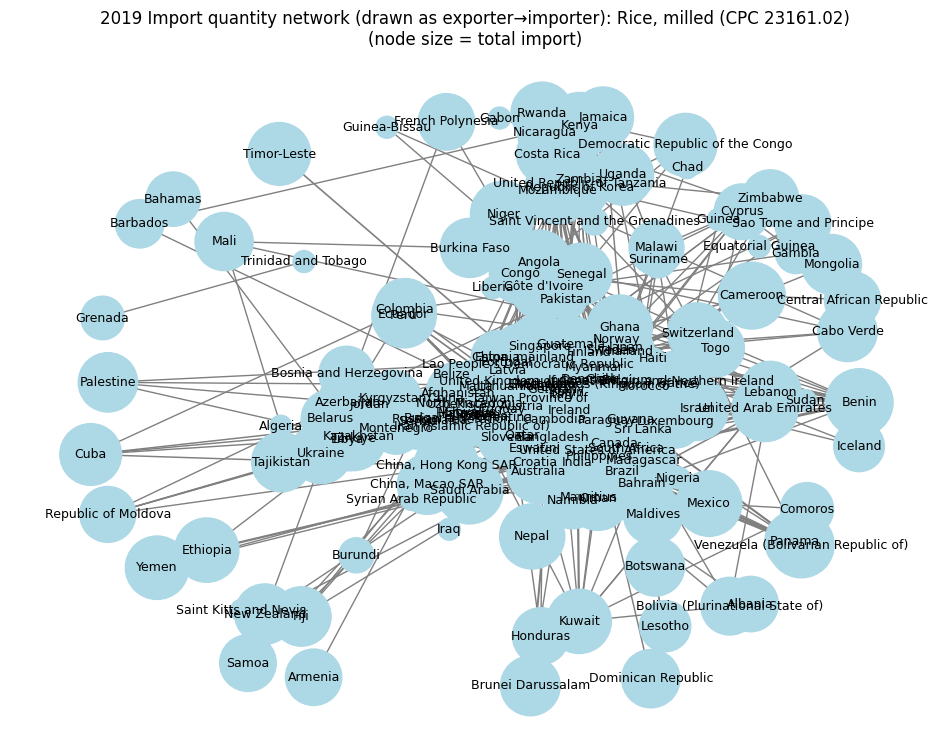

In [59]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# --- 列名（あなたのdfに固定）
REPORTER = "Reporter Countries"   # Import側では importer（輸入を報告する国）
PARTNER  = "Partner Countries"    # Import側では exporter（相手国＝輸出国として扱う）
ITEMCPC  = "Item Code (CPC)"
ELEMENT  = "Element"

def scale_sizes(values_dict, node_list, out_range=(250, 2500), log_scale=True):
    vals = np.array([float(values_dict.get(n, 0.0)) for n in node_list], dtype=float)
    if log_scale:
        vals = np.log1p(vals)
    vmin, vmax = vals.min(), vals.max()
    if vmax == vmin:
        return np.full(len(node_list), np.mean(out_range), dtype=float)
    a, b = out_range
    return a + (vals - vmin) * (b - a) / (vmax - vmin)

def build_import_quantity_edges_with_share(
    df,
    year=2019,
    item_code_cpc="23161.02",
    dest_share_threshold=0.01,
    top_n_dest=10
):
    ycol = f"Y{year}"

    # 1) フィルタ
    df2 = df.copy()
    df2 = df2[df2[ELEMENT].astype(str).str.strip().str.lower() == "import quantity"]
    df2 = df2[df2[ITEMCPC].astype(str).str.contains(str(item_code_cpc), na=False)]

    # 2) 年列 numeric
    if ycol not in df2.columns:
        raise ValueError(f"{ycol} がdfにありません")
    df2[ycol] = pd.to_numeric(df2[ycol], errors="coerce").fillna(0)

    # 3) Importデータを exporter->importer に読み替え（partner -> reporter）
    grp = (
        df2.groupby([PARTNER, REPORTER], as_index=False)[ycol]
           .sum()
           .rename(columns={PARTNER:"exporter", REPORTER:"importer", ycol:"value"})
    )

    # 4) exporter別シェア
    tot = grp.groupby("exporter", as_index=False)["value"].sum().rename(columns={"value":"exporter_total"})
    grp = grp.merge(tot, on="exporter", how="left")
    grp["dest_share"] = grp["value"] / grp["exporter_total"].replace(0, pd.NA)
    grp = grp.dropna(subset=["dest_share"])

    # 5) 見やすさフィルタ
    if dest_share_threshold is not None:
        grp = grp[grp["dest_share"] >= dest_share_threshold]
    if top_n_dest is not None:
        grp = grp.sort_values(["exporter","value"], ascending=[True, False]).groupby("exporter").head(top_n_dest)

    return grp.reset_index(drop=True)

def plot_import_quantity_network(
    grp_plot,
    grp_all_for_sizes=None,
    year=2019,
    item_code_cpc="23161.02",
    node_size_mode="import",   # "export" or "import"
    figsize=(12, 9),
):
    """
    grp_plot: 表示に使う（フィルタ後）エッジ
    grp_all_for_sizes: ノードサイズ計算に使う（通常はフィルタ前の全エッジが望ましい）
    """
    if grp_plot.empty:
        print("条件に一致するデータがありません。閾値/topNを緩めてください。")
        return

    if grp_all_for_sizes is None:
        grp_all_for_sizes = grp_plot

    # --- Graph ---
    G = nx.DiGraph()
    for _, r in grp_plot.iterrows():
        u, v = str(r["exporter"]), str(r["importer"])
        w = float(r["value"])
        if G.has_edge(u, v):
            G[u][v]["weight"] += w
        else:
            G.add_edge(u, v, weight=w)

    # --- sizes ---
    exporter_total = grp_all_for_sizes.groupby("exporter")["value"].sum().to_dict()
    importer_total = grp_all_for_sizes.groupby("importer")["value"].sum().to_dict()

    nodes = list(G.nodes())
    if node_size_mode == "export":
        size_dict = exporter_total
        suffix = "node size = total export (from Import stats)"
    else:
        size_dict = importer_total
        suffix = "node size = total import"

    node_sizes = scale_sizes(size_dict, nodes, out_range=(250, 2500), log_scale=True)

    # --- layout/edges ---
    pos = nx.spring_layout(G, k=0.6, iterations=60, seed=1)
    weights = [G[u][v]["weight"] for u, v in G.edges()]
    maxw = max(weights) if weights else 1.0
    widths = [1 + 5*(w/maxw) for w in weights]

    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue")
    nx.draw_networkx_labels(G, pos, font_size=9)
    nx.draw_networkx_edges(G, pos, width=widths, arrowstyle="->", arrowsize=12, edge_color="gray")
    plt.title(f"{year} Import quantity network (drawn as exporter→importer): Rice, milled (CPC {item_code_cpc})\n({suffix})")
    plt.axis("off")
    plt.show()

# ===== 実行例 =====
YEAR = 2019
ITEMCODE = "23161.02"

# ノードサイズ用（できればフィルタ無しの全エッジ）
grp_imp_all = build_import_quantity_edges_with_share(
    df, year=YEAR, item_code_cpc=ITEMCODE,
    dest_share_threshold=0.0, top_n_dest=None
)

# 表示用（見やすくフィルタ）
grp_imp_plot = build_import_quantity_edges_with_share(
    df, year=YEAR, item_code_cpc=ITEMCODE,
    dest_share_threshold=0.01, top_n_dest=10
)

display(grp_imp_plot.head(30))

plot_import_quantity_network(
    grp_imp_plot,
    grp_all_for_sizes=grp_imp_all,
    year=YEAR,
    item_code_cpc=ITEMCODE,
    node_size_mode="import",   # ← "export" にすると輸出国側の総量でサイズ
    figsize=(12, 9),
)


,exporter,importer,value,exporter_total,dest_share
0,Afghanistan,Pakistan,4097.82,6553.08,0.625327
1,Afghanistan,India,2422.03,6553.08,0.369602
2,Argentina,Chile,94868.40,243841.26,0.389058
3,Argentina,Brazil,63755.90,243841.26,0.261465
4,Argentina,Iraq,31200.00,243841.26,0.127952
5,Argentina,Costa Rica,13322.40,243841.26,0.054636
6,Argentina,Bolivia (Plurinational State of),13026.20,243841.26,0.053421
7,Argentina,Mexico,13023.30,243841.26,0.053409
8,Argentina,Türkiye,6465.70,243841.26,0.026516
9,Argentina,Peru,4494.70,243841.26,0.018433


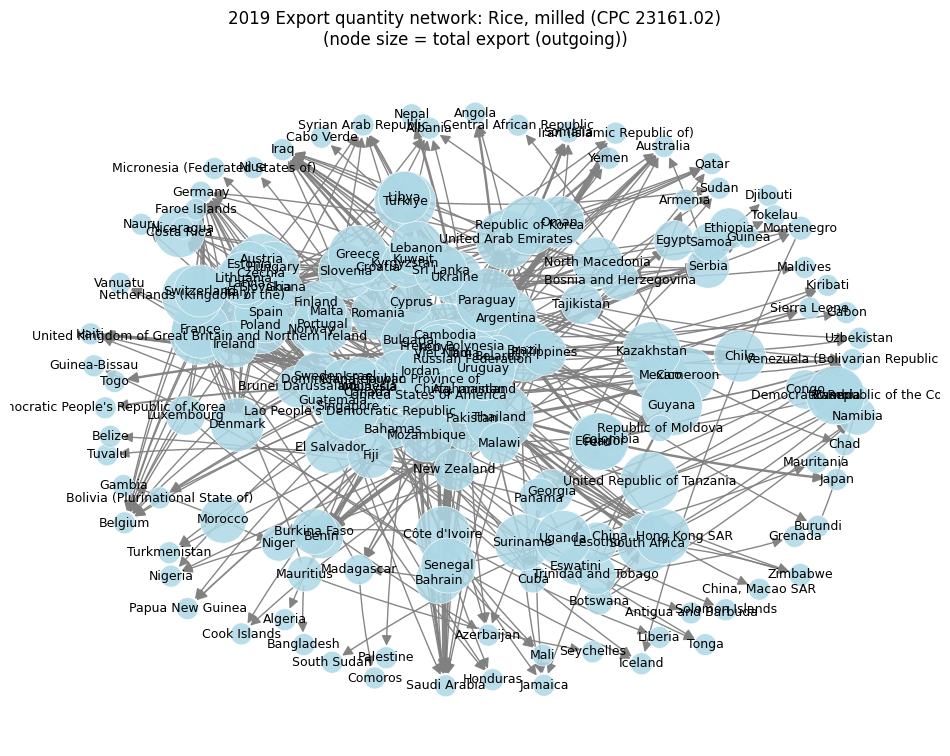

,exporter,importer,value,exporter_total,dest_share
0,Afghanistan,Uzbekistan,419.17,475.33,0.881851
1,Afghanistan,Kazakhstan,21.96,475.33,0.046199
2,Afghanistan,Saudi Arabia,21.20,475.33,0.044601
3,Afghanistan,Mozambique,7.00,475.33,0.014727
4,Afghanistan,Canada,6.00,475.33,0.012623
5,Algeria,Libya,35.25,36.11,0.976184
6,Algeria,Mali,0.86,36.11,0.023816
7,Angola,Democratic Republic of the Congo,12.00,13.85,0.866426
8,Angola,Namibia,1.85,13.85,0.133574
9,Argentina,Chile,90196.65,227569.88,0.396347


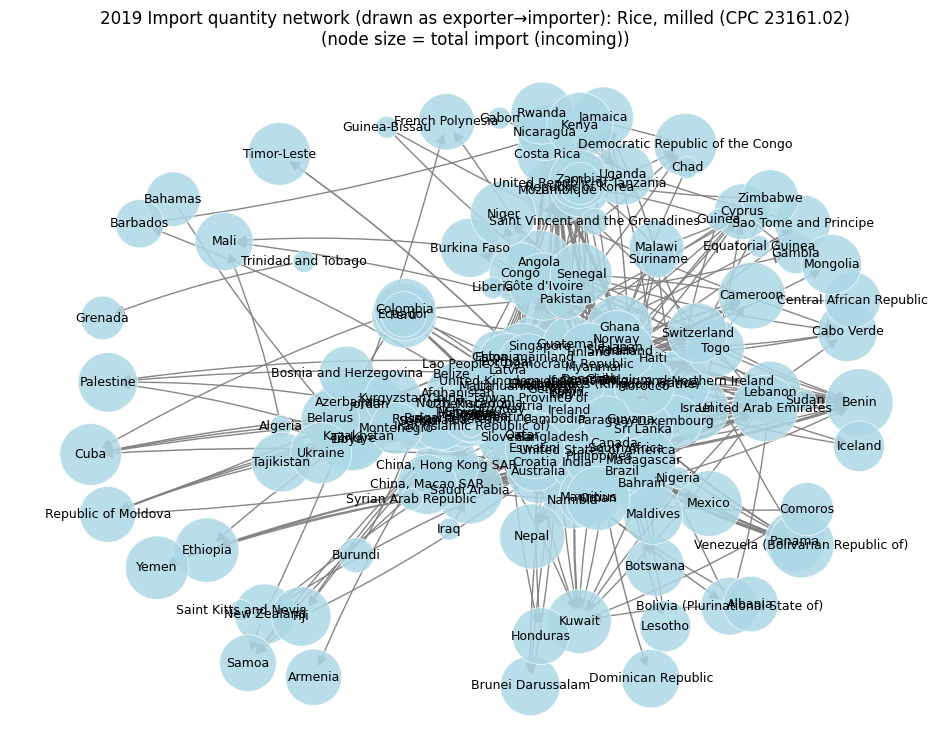

In [62]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# =========================================
# Settings (your DF column names are fixed)
# =========================================
REPORTER = "Reporter Countries"
PARTNER  = "Partner Countries"
ITEMCPC  = "Item Code (CPC)"
ELEMENT  = "Element"

# =========================================
# Utilities
# =========================================
def _scale_node_sizes(value_dict, nodes, out_range=(250, 2500), log_scale=True):
    """Map {node: value} -> node_size array in out_range."""
    vals = np.array([float(value_dict.get(n, 0.0)) for n in nodes], dtype=float)
    if log_scale:
        vals = np.log1p(vals)  # compress extremes, keep 0 at 0
    vmin, vmax = vals.min(), vals.max()
    if vmax == vmin:
        return np.full(len(nodes), np.mean(out_range), dtype=float)
    a, b = out_range
    return a + (vals - vmin) * (b - a) / (vmax - vmin)

def _build_edges_export_quantity(
    df, year=2019, item_code_cpc="23161.02",
    dest_share_threshold=0.01, top_n_dest=10
):
    """
    Export quantity:
      reporter = exporter
      partner  = importer
      edge direction: exporter -> importer
    Returns edges DF with columns: exporter, importer, value, exporter_total, dest_share
    """
    ycol = f"Y{year}"
    need = [REPORTER, PARTNER, ITEMCPC, ELEMENT, ycol]
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in df: {missing}")

    df2 = df.copy()

    # filter element + item code
    df2 = df2[df2[ELEMENT].astype(str).str.strip().str.lower().eq("export quantity")]
    df2 = df2[df2[ITEMCPC].astype(str).str.contains(str(item_code_cpc), na=False)]

    # numeric
    df2[ycol] = pd.to_numeric(df2[ycol], errors="coerce").fillna(0)

    # aggregate
    grp = (
        df2.groupby([REPORTER, PARTNER], as_index=False)[ycol]
           .sum()
           .rename(columns={REPORTER: "exporter", PARTNER: "importer", ycol: "value"})
    )

    # exporter totals + share
    tot = grp.groupby("exporter", as_index=False)["value"].sum().rename(columns={"value": "exporter_total"})
    grp = grp.merge(tot, on="exporter", how="left")
    grp["dest_share"] = grp["value"] / grp["exporter_total"].replace(0, pd.NA)
    grp = grp.dropna(subset=["dest_share"])

    # filters for readability
    if dest_share_threshold is not None:
        grp = grp[grp["dest_share"] >= dest_share_threshold]
    if top_n_dest is not None:
        grp = (
            grp.sort_values(["exporter", "value"], ascending=[True, False])
               .groupby("exporter", as_index=False, group_keys=False)
               .head(top_n_dest)
        )

    return grp.reset_index(drop=True)

def _build_edges_import_quantity_drawn_as_exporter_to_importer(
    df, year=2019, item_code_cpc="23161.02",
    dest_share_threshold=0.01, top_n_dest=10
):
    """
    Import quantity in FAO DTM:
      reporter = importer (reporting import)
      partner  = exporter (counterparty)
    But we DRAW as goods-flow exporter -> importer:
      exporter = partner
      importer = reporter
    Returns edges DF with columns: exporter, importer, value, exporter_total, dest_share
    """
    ycol = f"Y{year}"
    need = [REPORTER, PARTNER, ITEMCPC, ELEMENT, ycol]
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in df: {missing}")

    df2 = df.copy()

    # filter element + item code
    df2 = df2[df2[ELEMENT].astype(str).str.strip().str.lower().eq("import quantity")]
    df2 = df2[df2[ITEMCPC].astype(str).str.contains(str(item_code_cpc), na=False)]

    # numeric
    df2[ycol] = pd.to_numeric(df2[ycol], errors="coerce").fillna(0)

    # aggregate (partner->reporter)
    grp = (
        df2.groupby([PARTNER, REPORTER], as_index=False)[ycol]
           .sum()
           .rename(columns={PARTNER: "exporter", REPORTER: "importer", ycol: "value"})
    )

    # exporter totals + share
    tot = grp.groupby("exporter", as_index=False)["value"].sum().rename(columns={"value": "exporter_total"})
    grp = grp.merge(tot, on="exporter", how="left")
    grp["dest_share"] = grp["value"] / grp["exporter_total"].replace(0, pd.NA)
    grp = grp.dropna(subset=["dest_share"])

    # filters for readability
    if dest_share_threshold is not None:
        grp = grp[grp["dest_share"] >= dest_share_threshold]
    if top_n_dest is not None:
        grp = (
            grp.sort_values(["exporter", "value"], ascending=[True, False])
               .groupby("exporter", as_index=False, group_keys=False)
               .head(top_n_dest)
        )

    return grp.reset_index(drop=True)

def plot_trade_network_on_top_of_nodes(
    edges_plot,
    edges_all_for_sizes=None,
    title="",
    node_size_mode="export",          # "export" or "import"
    node_size_range=(250, 2500),
    log_scale=True,
    figsize=(12, 9),
    seed=1,
    k=0.6,
    iterations=60,
    arrowstyle="-|>",
    arrowsize=15,
    connection_rad=0.05,
):
    """
    edges_plot must have columns: exporter, importer, value
    edges_all_for_sizes: compute node sizes from totals; if None, uses edges_plot
    node_size_mode:
      - "export": node size proportional to total outgoing (sum by exporter) in edges_all_for_sizes
      - "import": node size proportional to total incoming (sum by importer) in edges_all_for_sizes

    IMPORTANT: edges are drawn AFTER nodes so they overlap nodes (as requested).
    """
    if edges_plot is None or edges_plot.empty:
        print("No edges to plot (empty after filters). Lower dest_share_threshold / raise top_n_dest / check year & item.")
        return

    if edges_all_for_sizes is None or edges_all_for_sizes.empty:
        edges_all_for_sizes = edges_plot

    # Build graph
    G = nx.DiGraph()
    for _, r in edges_plot.iterrows():
        u = str(r["exporter"])
        v = str(r["importer"])
        w = float(r["value"])
        if G.has_edge(u, v):
            G[u][v]["weight"] += w
        else:
            G.add_edge(u, v, weight=w)

    nodes = list(G.nodes())

    # Node totals from edges_all_for_sizes
    out_tot = edges_all_for_sizes.groupby("exporter")["value"].sum().to_dict()
    in_tot  = edges_all_for_sizes.groupby("importer")["value"].sum().to_dict()

    if node_size_mode.lower() == "import":
        size_dict = in_tot
        subtitle = "node size = total import (incoming)"
    else:
        size_dict = out_tot
        subtitle = "node size = total export (outgoing)"

    node_sizes = _scale_node_sizes(size_dict, nodes, out_range=node_size_range, log_scale=log_scale)

    # Layout
    pos = nx.spring_layout(G, k=k, iterations=iterations, seed=seed)

    # Edge widths
    weights = [G[u][v]["weight"] for u, v in G.edges()]
    maxw = max(weights) if weights else 1.0
    widths = [1 + 5 * (w / maxw) for w in weights]

    plt.figure(figsize=figsize)

    # 1) Nodes first (behind)
    nx.draw_networkx_nodes(
        G, pos,
        node_size=node_sizes,
        node_color="lightblue",
        alpha=0.85,
        linewidths=0.5,
        edgecolors="white",
    )

    # 2) Labels
    nx.draw_networkx_labels(G, pos, font_size=9)

    # 3) Edges last (on top of nodes)  ← as you requested
    nx.draw_networkx_edges(
        G, pos,
        width=widths,
        edge_color="gray",
        alpha=0.95,
        arrows=True,
        arrowstyle=arrowstyle,
        arrowsize=arrowsize,
        connectionstyle=f"arc3,rad={connection_rad}",
    )

    if title:
        plt.title(f"{title}\n({subtitle})")
    else:
        plt.title(subtitle)

    plt.axis("off")
    plt.show()

# =========================================
# One-shot runner
# =========================================
def run_trade_network(
    df,
    flow="export",                    # "export" or "import"
    year=2019,
    item_code_cpc="23161.02",
    # filters for plot readability
    dest_share_threshold_plot=0.01,
    top_n_dest_plot=10,
    # for node size totals (usually keep all edges)
    dest_share_threshold_sizes=0.0,
    top_n_dest_sizes=None,
    # node sizes
    node_size_mode="export",          # "export" or "import"
    node_size_range=(250, 2500),
    log_scale=True,
    # drawing
    figsize=(12, 9),
):
    flow_l = str(flow).strip().lower()
    if flow_l not in ("export", "import"):
        raise ValueError('flow must be "export" or "import"')

    if flow_l == "export":
        edges_all = _build_edges_export_quantity(
            df, year=year, item_code_cpc=item_code_cpc,
            dest_share_threshold=dest_share_threshold_sizes,
            top_n_dest=top_n_dest_sizes
        )
        edges_plot = _build_edges_export_quantity(
            df, year=year, item_code_cpc=item_code_cpc,
            dest_share_threshold=dest_share_threshold_plot,
            top_n_dest=top_n_dest_plot
        )
        title = f"{year} Export quantity network: Rice, milled (CPC {item_code_cpc})"
    else:
        edges_all = _build_edges_import_quantity_drawn_as_exporter_to_importer(
            df, year=year, item_code_cpc=item_code_cpc,
            dest_share_threshold=dest_share_threshold_sizes,
            top_n_dest=top_n_dest_sizes
        )
        edges_plot = _build_edges_import_quantity_drawn_as_exporter_to_importer(
            df, year=year, item_code_cpc=item_code_cpc,
            dest_share_threshold=dest_share_threshold_plot,
            top_n_dest=top_n_dest_plot
        )
        title = f"{year} Import quantity network (drawn as exporter→importer): Rice, milled (CPC {item_code_cpc})"

    display(edges_plot.head(30))

    plot_trade_network_on_top_of_nodes(
        edges_plot=edges_plot,
        edges_all_for_sizes=edges_all,
        title=title,
        node_size_mode=node_size_mode,
        node_size_range=node_size_range,
        log_scale=log_scale,
        figsize=figsize,
        arrowsize=15,            # a bit bigger for visibility
        connection_rad=0.05,
    )

    return edges_plot, edges_all

# =========================================
# Example usage
# =========================================
YEAR = 2019
ITEM = "23161.02"

# --- Export quantity ---
edges_plot_exp, edges_all_exp = run_trade_network(
    df,
    flow="export",
    year=YEAR,
    item_code_cpc=ITEM,
    dest_share_threshold_plot=0.01,
    top_n_dest_plot=10,
    dest_share_threshold_sizes=0.0,
    top_n_dest_sizes=None,
    node_size_mode="export",   # "export" or "import"
    node_size_range=(250, 2500),
    log_scale=True,
    figsize=(12, 9),
)

# --- Import quantity (drawn as exporter->importer) ---
edges_plot_imp, edges_all_imp = run_trade_network(
    df,
    flow="import",
    year=YEAR,
    item_code_cpc=ITEM,
    dest_share_threshold_plot=0.01,
    top_n_dest_plot=10,
    dest_share_threshold_sizes=0.0,
    top_n_dest_sizes=None,
    node_size_mode="import",   # "export" or "import"
    node_size_range=(250, 2500),
    log_scale=True,
    figsize=(12, 9),
)


# 毎回csv読み込むのはめんどくさいから、高速形式？で保存

In [ ]:
df.to_pickle("trade_full.pkl")
print("saved pickle:", df.shape)
#読み込むときは
#df = pd.read_pickle("trade_full.pkl")



saved pickle: (6640547, 51)


In [56]:
df = pd.read_pickle("trade_full.pkl")